In [76]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
from statsmodels.tsa.arima_model import ARMA

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose

In [78]:
arma_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\data\daily\commodities\metals\copper\COMEX_DL_HG1!, 1D.csv',index_col='time', parse_dates=True)

In [79]:
arma_df.head(10)

,open,high,low,close,Commercials long,Commercials short,Commercials net,Large Speculators long,Large Speculators short,Large Speculators net,...,OI,Commercials long.1,Commercials short.1,Commercials net.1,Large Speculators long.1,Large Speculators short.1,Large Speculators net.1,Small Speculators long.1,Small Speculators short.1,Small Speculators net.1
time,,,,,,,,,,,,,,,,,,,,,
1998-07-12 22:00:00+00:00,0.7205,0.7530,0.7190,0.7430,35301,-29311,5990,7136,-19139,-12003,...,69236,35301,-29311,5990,7136,-19139,-12003,25401,-19388,6013
1998-07-13 22:00:00+00:00,0.7460,0.7625,0.7440,0.7495,30641,-29716,925,6754,-14977,-8223,...,64407,30641,-29716,925,6754,-14977,-8223,26115,-18817,7298
1998-07-14 22:00:00+00:00,0.7510,0.7685,0.7495,0.7655,30641,-29716,925,6754,-14977,-8223,...,64407,30641,-29716,925,6754,-14977,-8223,26115,-18817,7298
1998-07-15 22:00:00+00:00,0.7750,0.7810,0.7655,0.7660,30641,-29716,925,6754,-14977,-8223,...,64407,30641,-29716,925,6754,-14977,-8223,26115,-18817,7298
1998-07-16 22:00:00+00:00,0.7660,0.7790,0.7610,0.7705,30641,-29716,925,6754,-14977,-8223,...,64407,30641,-29716,925,6754,-14977,-8223,26115,-18817,7298
1998-07-19 22:00:00+00:00,0.7800,0.7930,0.7780,0.7905,30641,-29716,925,6754,-14977,-8223,...,64407,30641,-29716,925,6754,-14977,-8223,26115,-18817,7298
1998-07-20 22:00:00+00:00,0.7860,0.7885,0.7690,0.7725,25837,-32897,-7060,5962,-7552,-1590,...,59100,25837,-32897,-7060,5962,-7552,-1590,25849,-17199,8650
1998-07-21 22:00:00+00:00,0.7705,0.7835,0.7690,0.7820,25837,-32897,-7060,5962,-7552,-1590,...,59100,25837,-32897,-7060,5962,-7552,-1590,25849,-17199,8650
1998-07-22 22:00:00+00:00,0.7800,0.7810,0.7710,0.7780,25837,-32897,-7060,5962,-7552,-1590,...,59100,25837,-32897,-7060,5962,-7552,-1590,25849,-17199,8650


In [80]:
print(len(arma_df))

6140


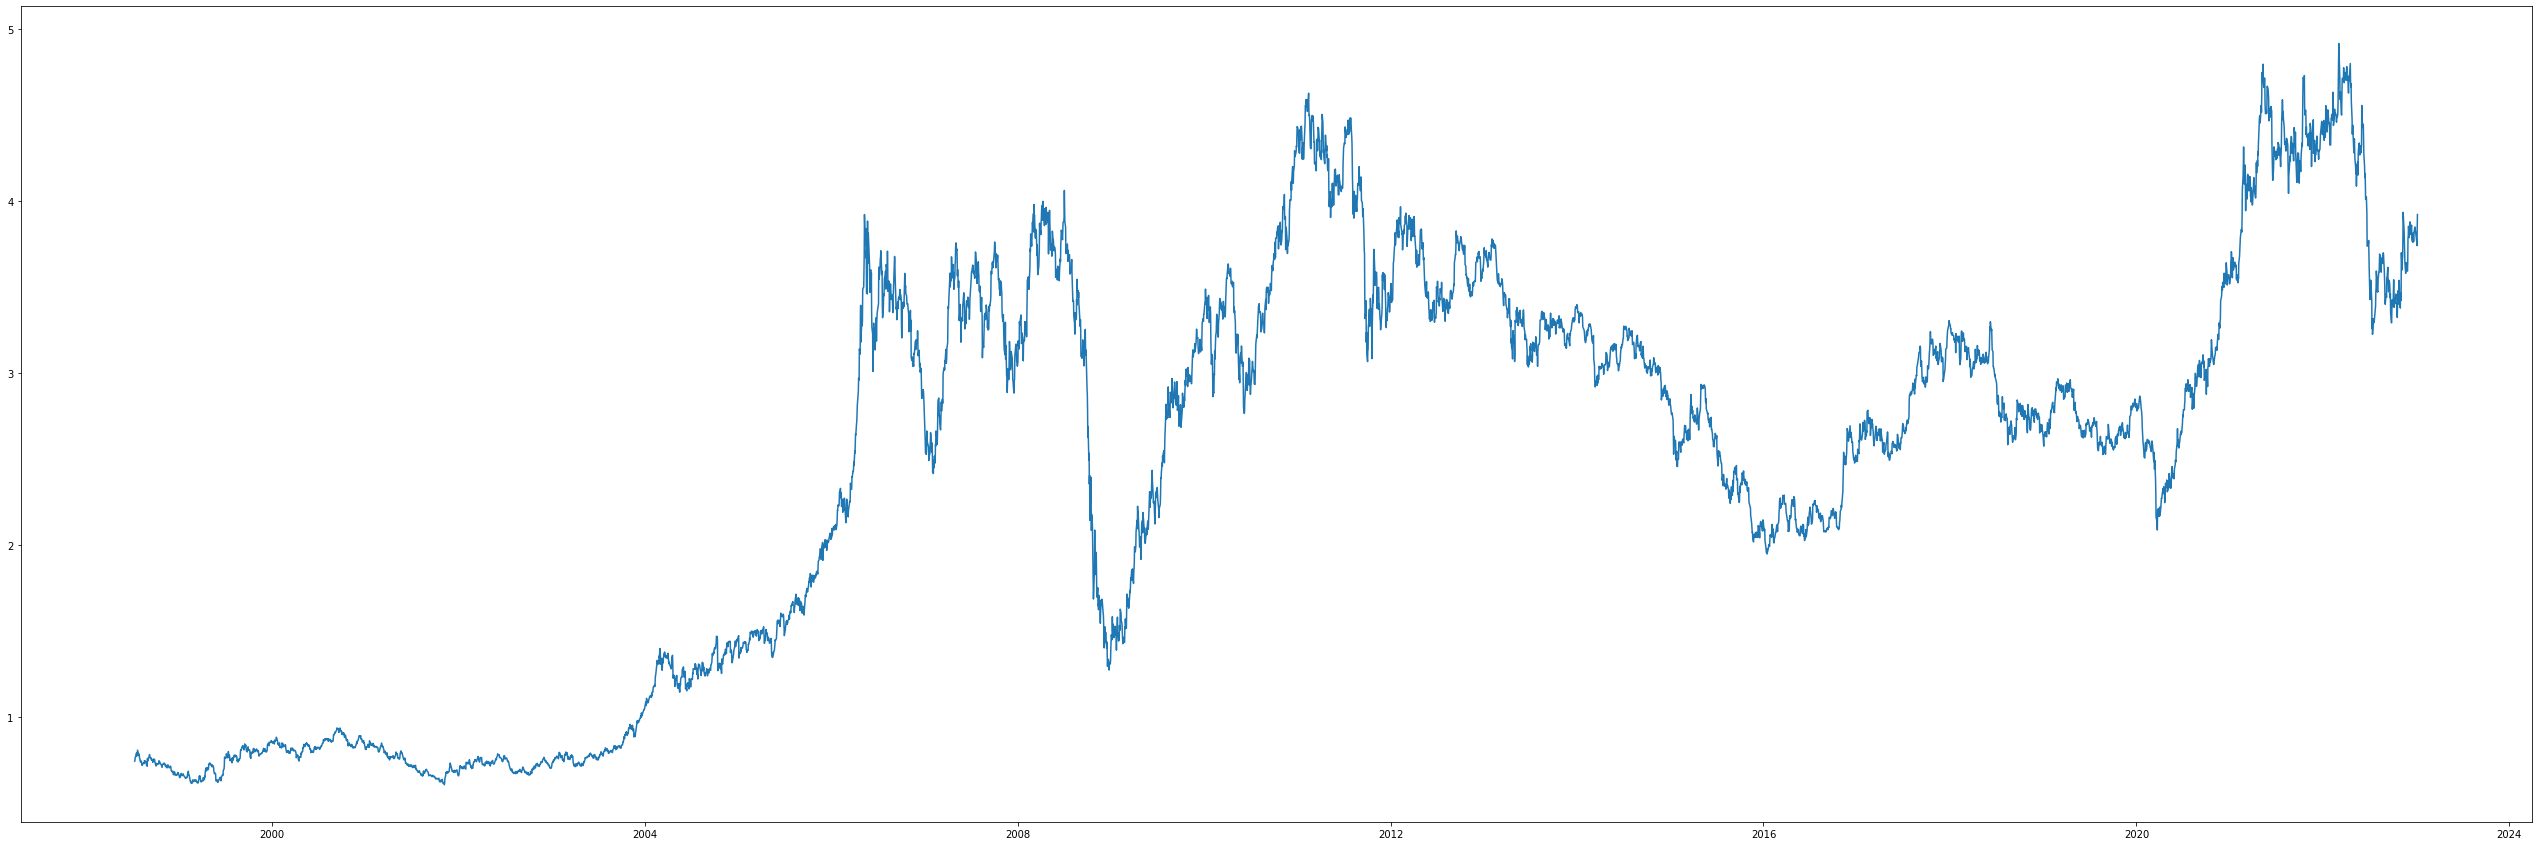

In [81]:
plt.figure(figsize=(45,15))
plt.plot(arma_df['close'])
plt.show()

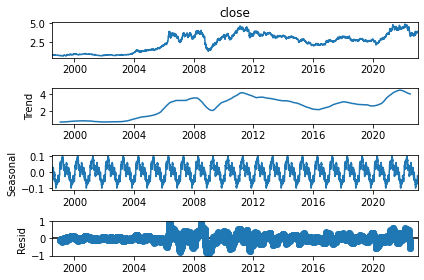

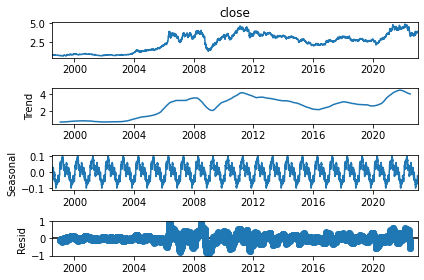

In [82]:

seasonal_result = seasonal_decompose(arma_df['close'], model="additive",period=252)

trend = seasonal_result.trend
seasonal = seasonal_result.seasonal
residual = seasonal_result.resid

seasonal_result.plot()

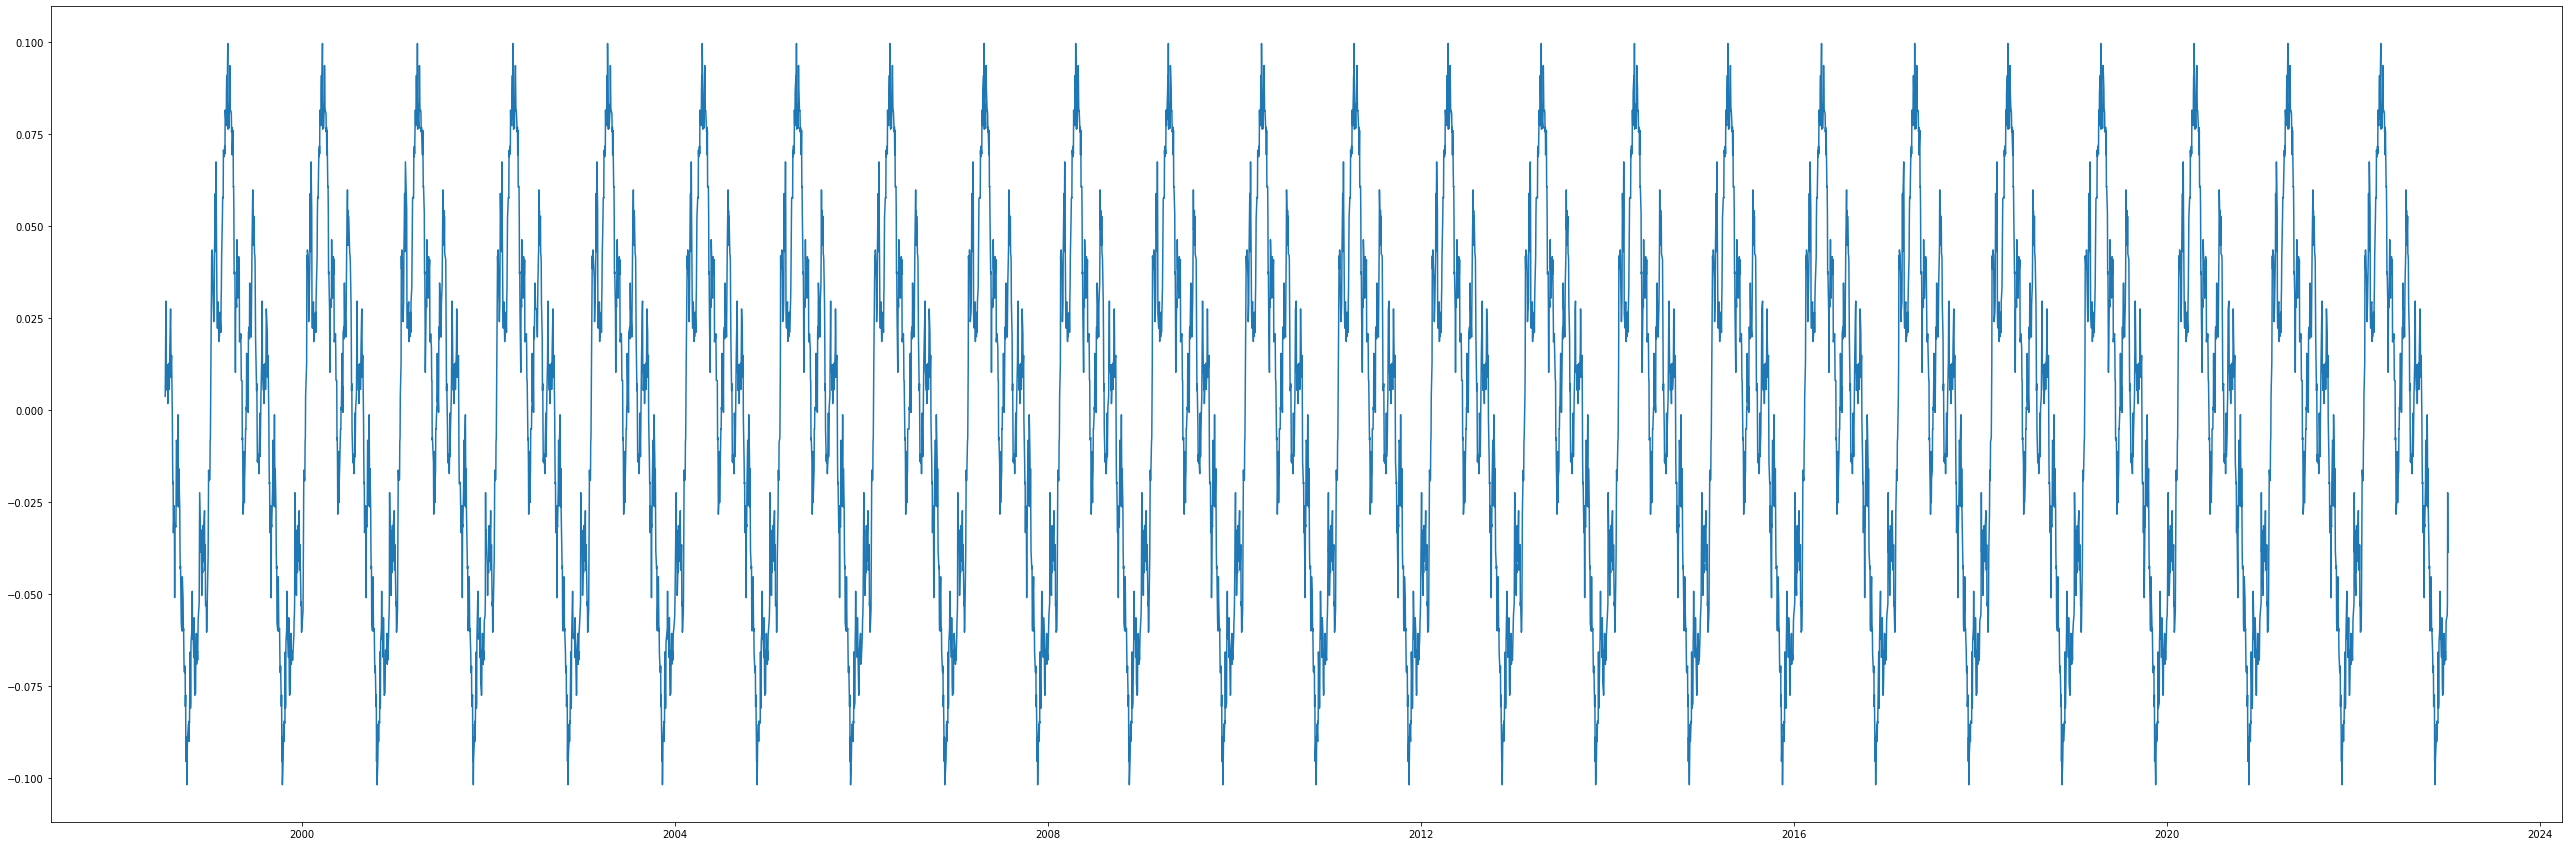

In [83]:
plt.figure(figsize=(45,15))

plt.plot(seasonal)

plt.show()

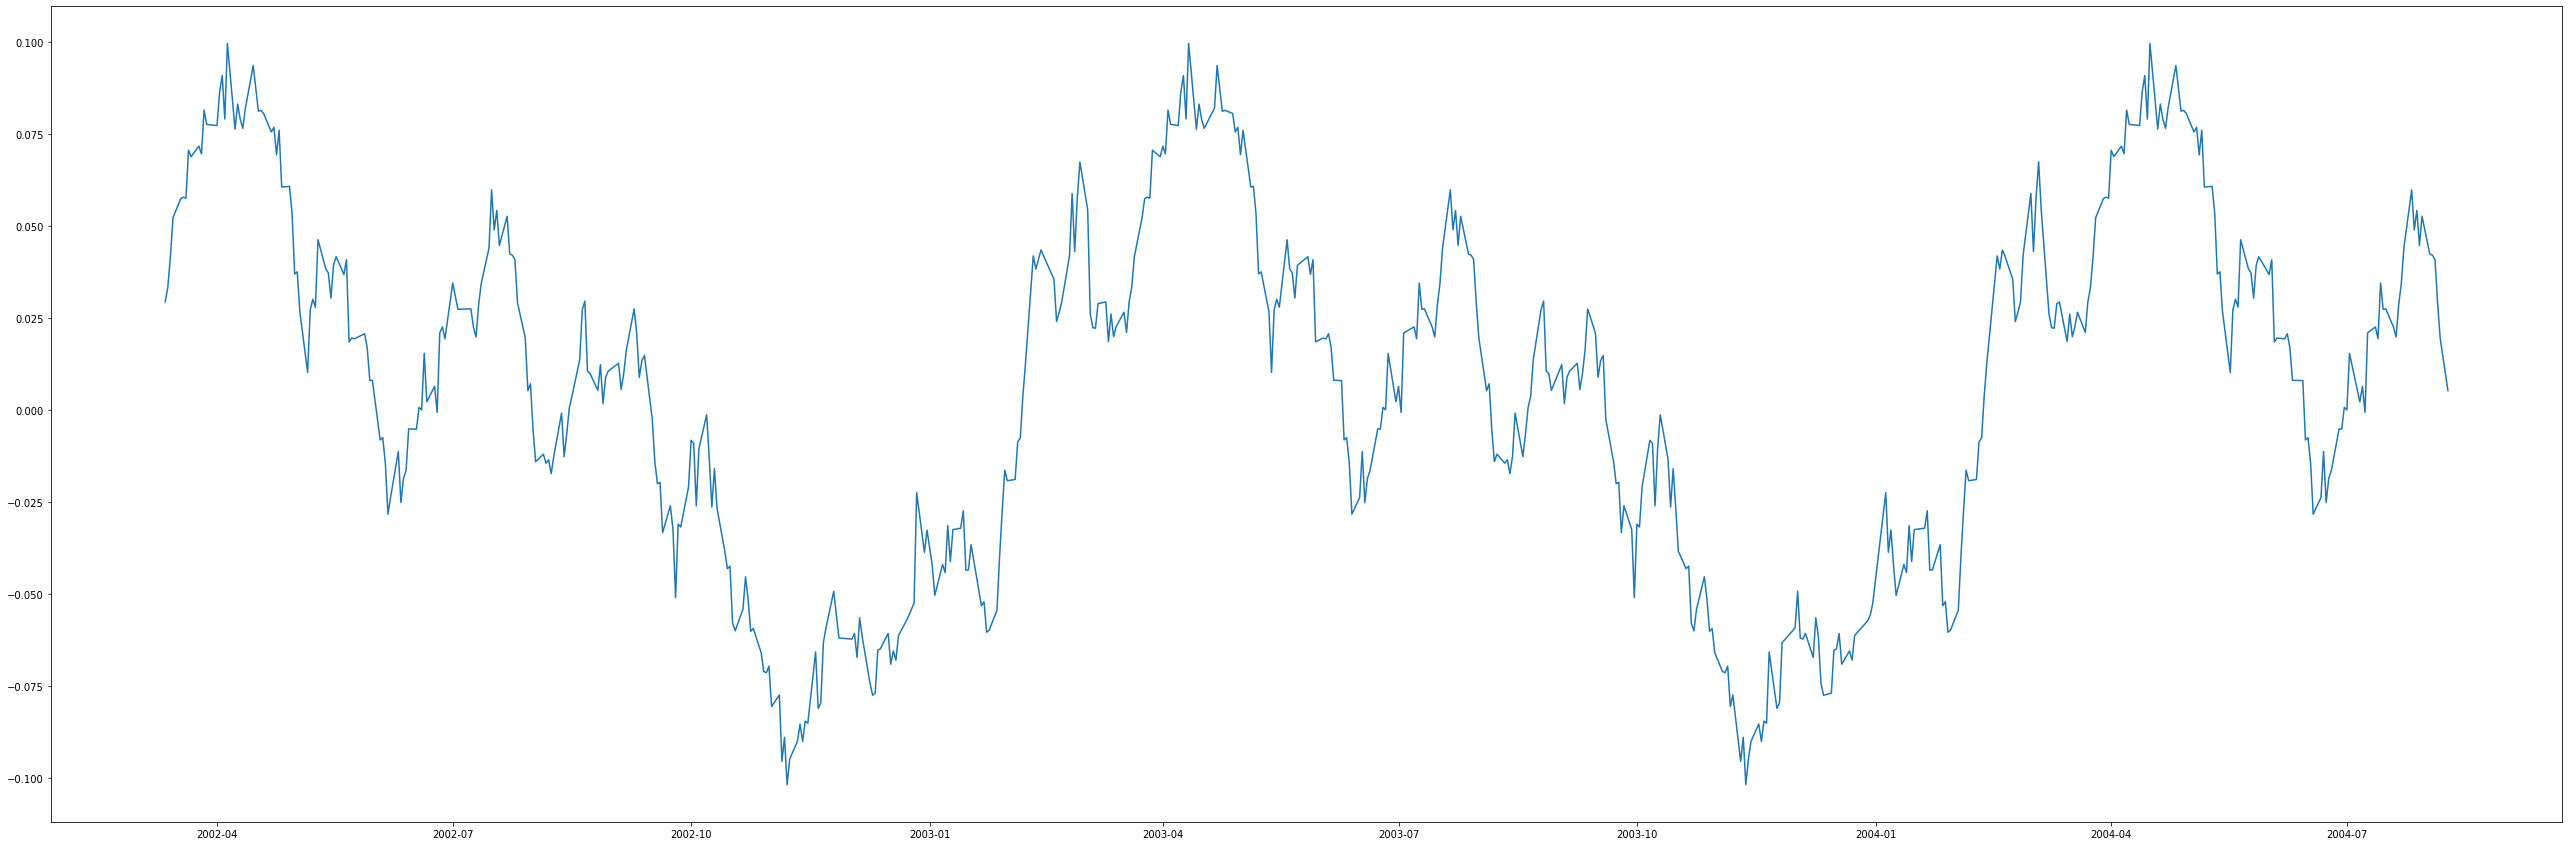

In [84]:
plt.figure(figsize=(45,15))

plt.plot(seasonal[900:1500])

plt.show()

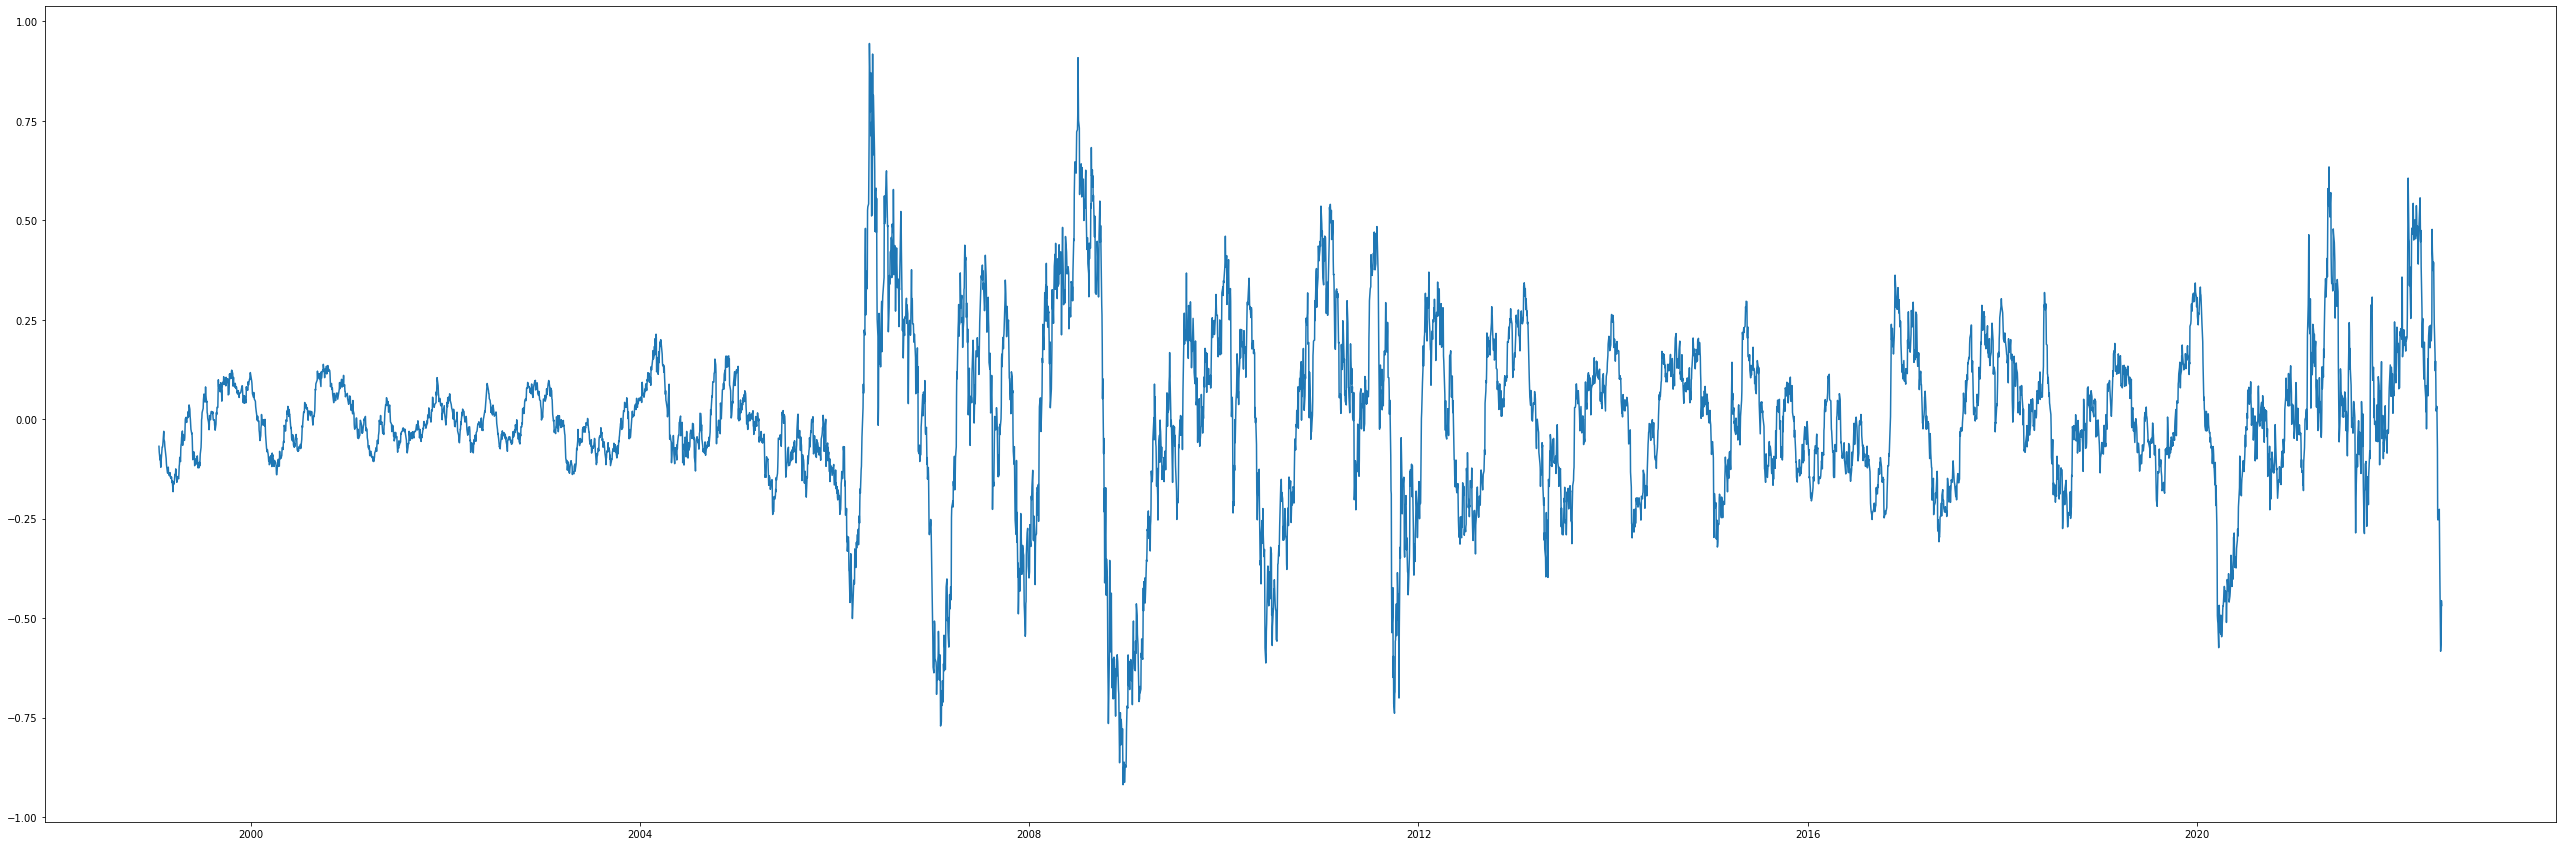

In [85]:
plt.figure(figsize=(45,15))

plt.plot(residual)

plt.show()

In [86]:
log_diff = np.log(arma_df['close']).diff(1).dropna(axis=0)

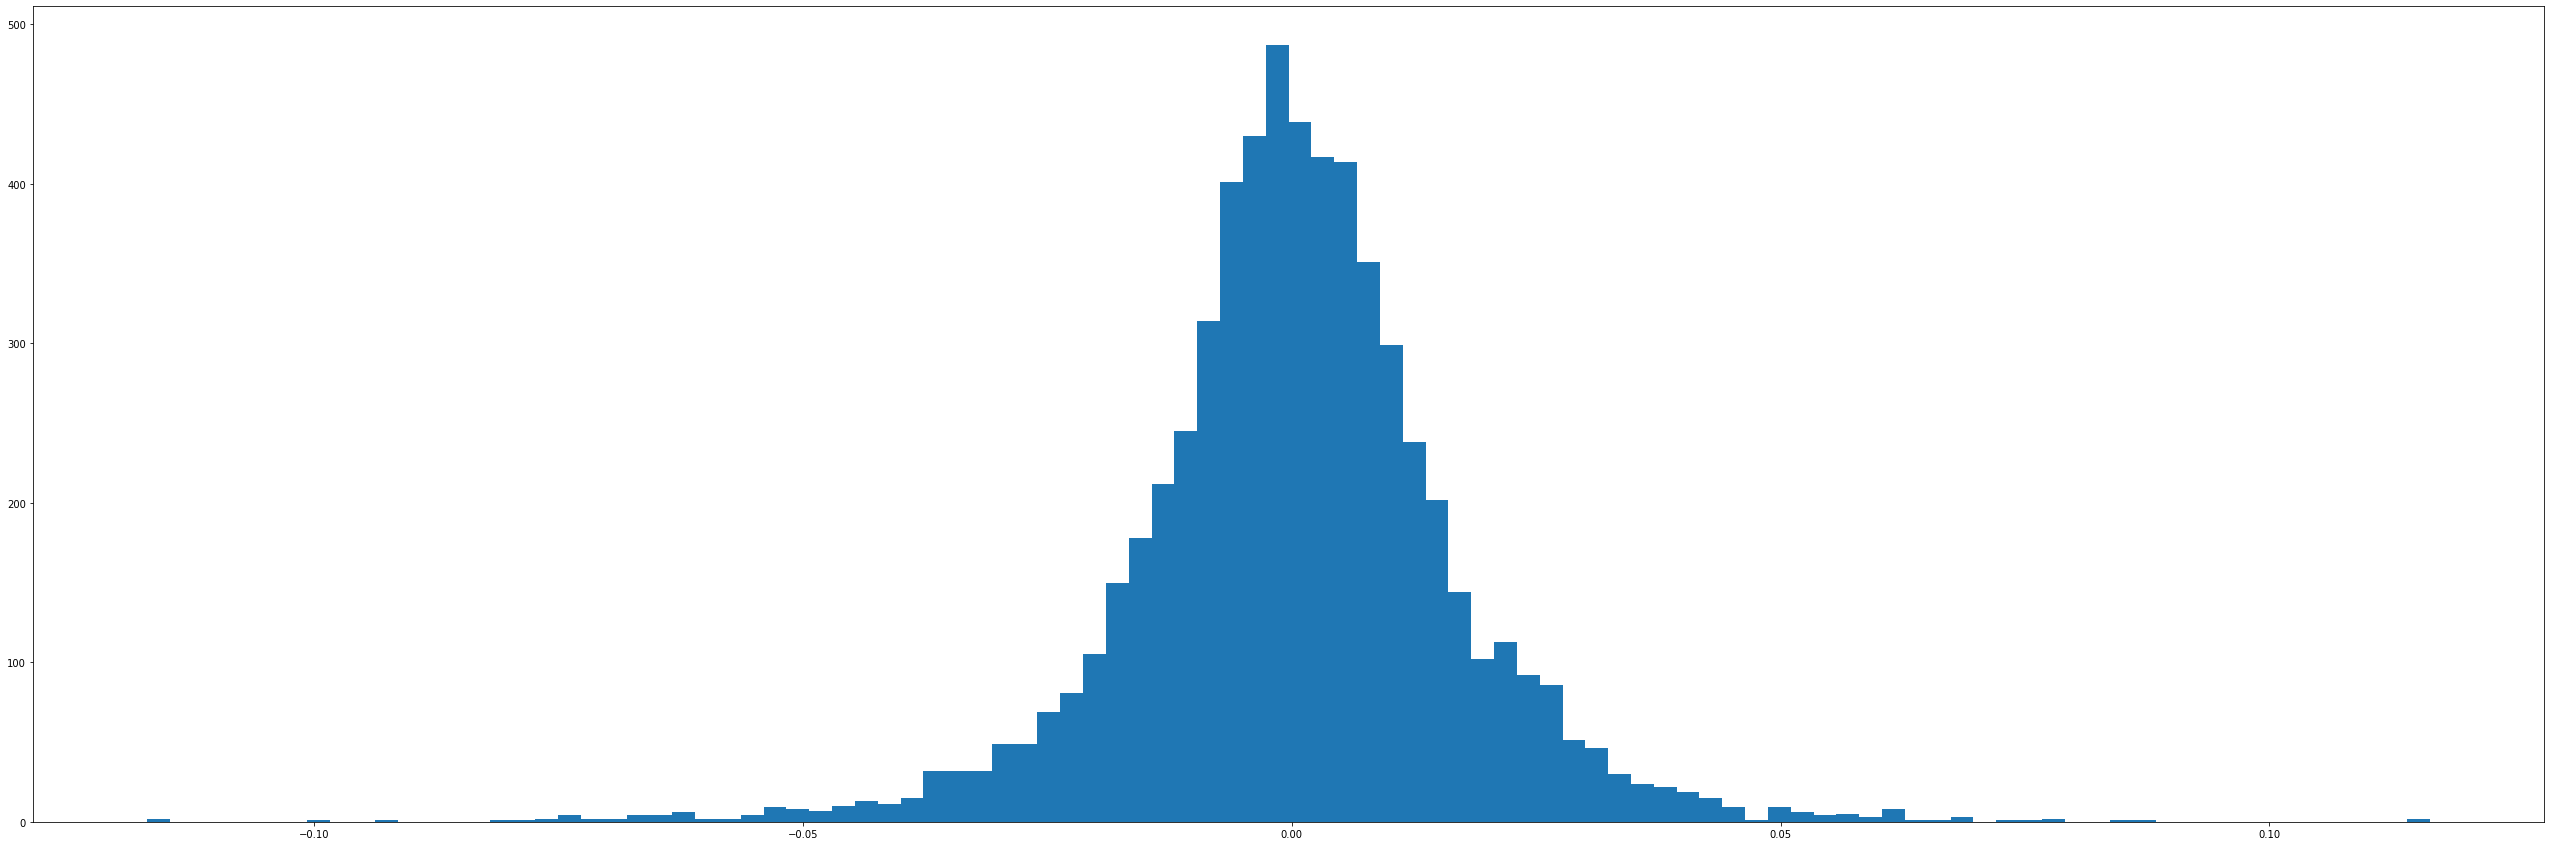

In [87]:
plt.figure(figsize=(45,15))

plt.hist(log_diff,bins=100)

plt.show()

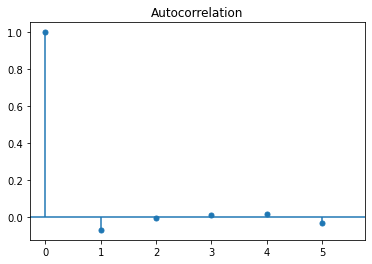

In [88]:
plot_acf(log_diff, alpha=1, lags=5).savefig("acf.jpg")

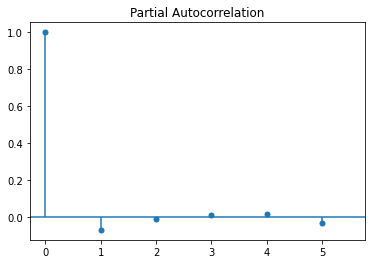

In [89]:
plot_pacf(log_diff, alpha=1, lags=5).savefig("pacf.jpg")